<a href="https://colab.research.google.com/github/vatsalvasani/CE155_ML/blob/main/CE155_LABWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB : 6**
### **LABWORK & EXERCISE**

### **Trying Vectorization On Sample DataSet**

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

text = [
  "Hi My name is Vatsal Vasani",
  "This is my python notebook",
  "This Is The Words I try to Vectorize",
  "I Am trying to create a big dataset",
  "Let's How Count Vectorizer Work."
]
count_vect=CountVectorizer()
count_matrix=count_vect.fit_transform(text)
count_array=count_matrix.toarray()
print(count_vect.get_feature_names())
print(count_array)


['am', 'big', 'count', 'create', 'dataset', 'hi', 'how', 'is', 'let', 'my', 'name', 'notebook', 'python', 'the', 'this', 'to', 'try', 'trying', 'vasani', 'vatsal', 'vectorize', 'vectorizer', 'words', 'work']
[[0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0]
 [1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **1) ANALYSE THE DATASET**

In [3]:
# importing some required libraries
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount("/content/drive")
columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("/content/drive/MyDrive/sem 6/ML/LAB 6/training.1600000.processed.noemoticon.csv", encoding="latin",names=columns)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df["sentiment"] = df["sentiment"].replace(4,1)
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


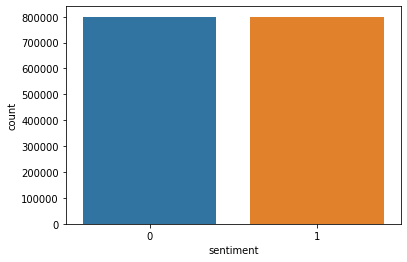

In [6]:
sns.countplot(x="sentiment",data=df)

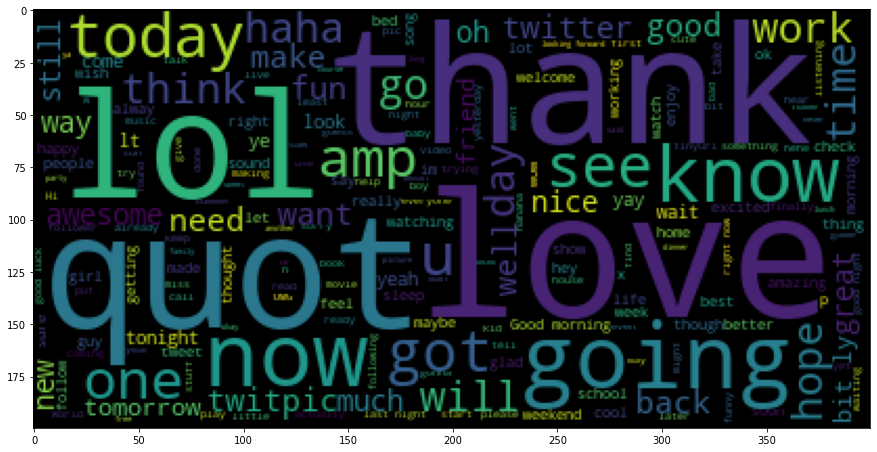

In [7]:
positive_tweets = df[df['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

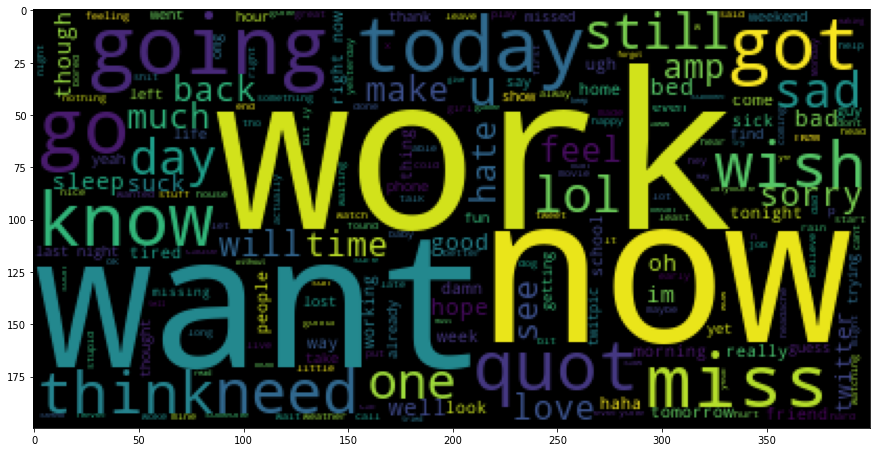

In [8]:
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

# **2) DATA PREPROCESSING**

In [9]:
df['sentiment'].unique()

array([0, 1])

In [10]:
#Separating positive and negative tweets
data_pos = df[df['sentiment'] == 1]
data_neg = df[df['sentiment'] == 0]

In [11]:
#taking one fourth data so we can run on our machine easily
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [12]:
#Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg]) 

In [13]:
#Making statement text in lower case
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [14]:
#Stopword List
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
# import nltk
# stopwordlist = nltk.download('stopwords')

# **i) REMOVING STOPWORDS**

In [15]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

# **ii) REMOVING URLS**

In [16]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

# **iii) REMOVING PUNCTUATION**

In [17]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

# **3) FEATURE EXTRACTION**

In [18]:
X=df.text
y=df.sentiment

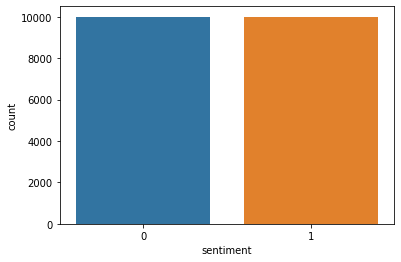

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
back=df.iloc[-10000:]
front=df.iloc[:10000]
df = pd.concat([front,back])

count_vect=CountVectorizer()
count_matrix=count_vect.fit_transform(df['text'])
sns.countplot(x="sentiment",data=df)

x=count_matrix
y=df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.10, random_state =26105111)


# **4) Train Multinomial Naive Bayes && Decision Tree**

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

def calculateAccuracy(cmat):

  truth=sum(cmat[i][i] for i in range(len(cmat)))
  total=0
  for row in cmat:
    for elem in row:
      total+=elem
  return truth/total

def multinomialNBModeling(x_train, x_test, y_train, y_test):
  multinomial_model=MultinomialNB(alpha=0.01)
  multinomial_model.fit(x_train,y_train)
  y_pred=multinomial_model.predict(x_test)

  mat1=confusion_matrix(y_pred,y_test)
  print("multinomial NB accuracy : ",calculateAccuracy(mat1))

In [21]:

def dtModeling(x_train, x_test, y_train, y_test):
  new_model=DecisionTreeClassifier(random_state=0)
  new_model.fit(x_train,y_train)
  y_pred=new_model.predict(x_test)
  cmat=confusion_matrix(y_pred,y_test)
  print("decision tree model accuracy : ",calculateAccuracy(cmat))

In [22]:
multinomialNBModeling(X_train, X_test, y_train, y_test)
dtModeling(X_train, X_test, y_train, y_test)

multinomial NB accuracy :  0.7305
decision tree model accuracy :  0.6815
